In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 5.1 Support Vector Machines (non-linear)

We can use the kernel trick to deal with non-linear decision boundaries.

$K(x, y) = \Phi(x)^T\Phi(y)$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'MSE')

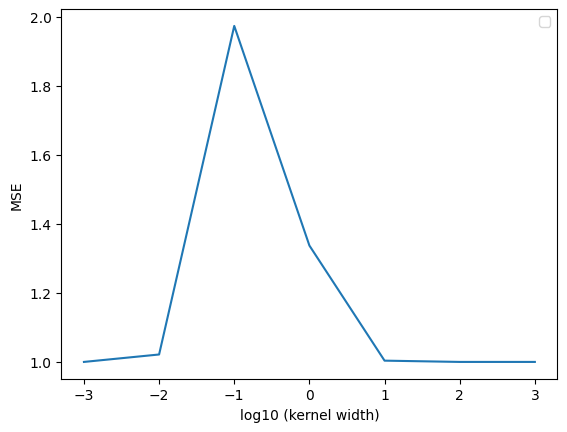

In [21]:
train_set = pr.gendatb([20, 20])
test_set = pr.gendatb([100, 100])
# pr.scatterr(train_set)

# Train a svc with a 'rbf' kernel (Gaussian) for small and large widths (0.1 - 10)
# TODO: check how performance varies
width_factors = [-3, -2, -1, 0, 1, 2, 3]
errors = []
for f in width_factors:
    svc = pr.svc(train_set, ('rbf', 0.1 ** f, 1))  # svc(a, (kernel_type, width, C)) where C is a tradeoff parameter
    err = pr.testr(test_set, svc, 'mse')
    errors.append(err)
    # pr.plotr(svc, color='r')

# plt.plot([0.1 ** f for f in width_factors], errors)
plt.plot(width_factors, errors)
plt.legend()
plt.xlabel('log10 (kernel width)')
plt.ylabel('MSE')

Below we use cross validation to optimize the hyperparameter $\sigma$ of an RBF (Gaussian) SVM.

$K(x, y) = e^{-\frac{||x-y||^2}{\sigma^2}}$

[  2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  36  37  38  39  40
  41  42  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  61  62  63  64  65  66  67  69  70  71  72  73  74  75  77  78  79  80
  81  82  83  84  85  86  88  89  90  91  92  93  94  96  97  98  99 100
 101 102 103 104 106 107 108 109 110 111 112 113 114 115 116 118 119 120
 121 123 124 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140
 141 142 143 144 146 147 148 149 150 151 152 153 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 229 230 231 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 248 249 250 251 252 253 254 256 257 258 259 260
 261 262 263 264 266 267 268 269 270 271 272 273 27

Text(0, 0.5, 'MSE')

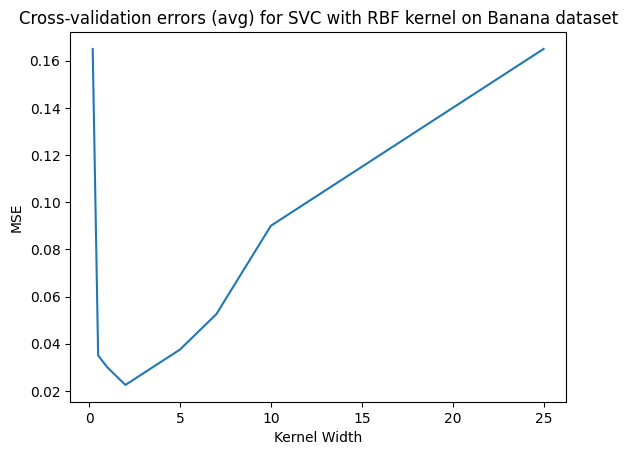

In [29]:
a = pr.gendatb([200, 200])
widths = [0.2, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0, 25.0]   # Which value is optimal?
C = 1.0
errors_cv = np.zeros((len(widths), 1))

for i in range(len(widths)):
    SVC = pr.svc([], ('rbf', widths[i], C))   # TODO: trained on no data?
    e = pr.prcrossval(a, SVC, k = 10)
    errors_cv[i] = np.mean(e)                 # Save error avged over 10 folds and replications

plt.plot(widths, errors_cv)
plt.title('Cross-validation errors (avg) for SVC with RBF kernel on Banana dataset')
plt.xlabel('Kernel Width')
plt.ylabel('MSE')